# Credit Risk Analysis

data source : https://www.kaggle.com/datasets/laotse/credit-risk-dataset

| Feature Name                 | Description                               |
|------------------------------|-------------------------------------------|
| person_age                   | Age                                       |
| person_income                | Annual Income                             |
| person_home_ownership        | Home ownership                            |
| person_emp_length            | Employment length (in years)              |
| loan_intent                  | Loan intent                               |
| loan_grade                   | Loan grade                                |
| loan_amnt                    | Loan amount                               |
| loan_int_rate                | Interest rate                             |
| loan_status                  | Loan status (0 is non default, 1 is default) |
| loan_percent_income          | Percent income                            |
| cb_person_default_on_file    | Historical default                        |
| cb_preson_cred_hist_length   | Credit history length                     |

In [1]:
# Install library
#!pip install kagglehub
#!pip install statsmodels

## Import Library and Setting

In [2]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import kagglehub
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import os

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# Checking library version
print("---Library version---", end = '\n')
print('pandas version: ', pd.__version__)
print('numpy version: ', np.__version__)
print('seaborn version: ', sns.__version__)
print('matplotlib version: ', mpl.__version__, end = '\n\n')

---Library version---
pandas version:  2.2.2
numpy version:  1.26.3
seaborn version:  0.13.2
matplotlib version:  3.9.2



In [3]:
# Setting library
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

mpl.font_manager.fontManager.addfont("fonts\Sarabun-Regular.ttf")
mpl.rc('font', family='Sarabun')
plt.rcParams ['font.family'] = ('Sarabun')

# ignore warnings
warnings.filterwarnings('ignore')

In [4]:
# Print current working directory
print("---Working Directory---", end = '\n')
print('List of Directory:', os.listdir(os.getcwd()))
print('List of Directory (Data):', os.listdir(os.getcwd() + '\\data'))

---Working Directory---
List of Directory: ['.git', '.ipynb_checkpoints', 'data', 'Explore.ipynb', 'fonts']
List of Directory (Data): ['credit_risk_dataset.csv']


## Import Data

In [5]:
source_name = "credit_risk_dataset.csv"

data = pd.read_csv(filepath_or_buffer=f'data/{source_name}')

with pd.option_context('display.max_rows', 10):
    display(data)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [6]:
print(f'Records: {data.shape[0]}, Variable: {data.shape[1]}')

Records: 32581, Variable: 12


## Overall of Data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [8]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


## Rename Columns

In [9]:
df = data.rename(columns=lambda x: x.replace("person_", "").title())
display(df)

,Age,Income,Home_Ownership,Emp_Length,Loan_Intent,Loan_Grade,Loan_Amnt,Loan_Int_Rate,Loan_Status,Loan_Percent_Income,Cb_Default_On_File,Cb_Cred_Hist_Length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


## Change Columns Type

In [10]:
df["Emp_Length"] = df["Emp_Length"].astype("Int64")
df["Loan_Int_Rate"] = df["Loan_Int_Rate"].astype("Float64")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  32581 non-null  int64  
 1   Income               32581 non-null  int64  
 2   Home_Ownership       32581 non-null  object 
 3   Emp_Length           31686 non-null  Int64  
 4   Loan_Intent          32581 non-null  object 
 5   Loan_Grade           32581 non-null  object 
 6   Loan_Amnt            32581 non-null  int64  
 7   Loan_Int_Rate        29465 non-null  Float64
 8   Loan_Status          32581 non-null  int64  
 9   Loan_Percent_Income  32581 non-null  float64
 10  Cb_Default_On_File   32581 non-null  object 
 11  Cb_Cred_Hist_Length  32581 non-null  int64  
dtypes: Float64(1), Int64(1), float64(1), int64(5), object(4)
memory usage: 3.0+ MB


## Check Missing or NaN value

In [12]:
for i in df.columns:
    print(f'{i} : {df[i].isna().sum()}')

Age : 0
Income : 0
Home_Ownership : 0
Emp_Length : 895
Loan_Intent : 0
Loan_Grade : 0
Loan_Amnt : 0
Loan_Int_Rate : 3116
Loan_Status : 0
Loan_Percent_Income : 0
Cb_Default_On_File : 0
Cb_Cred_Hist_Length : 0


In [13]:
print('Object columns with contain NaN values', end='\n\n')
for column in df.columns:
    if df[column].dtype == 'O' and df[column].isna().any():
        print(f"NaN in : '{column}'")
    else:
        print("None")

Object columns with contain NaN values

None
None
None
None
None
None
None
None
None
None
None
None


## Analysis and Understand insight of the Data

In [14]:
data.corr(numeric_only=True)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


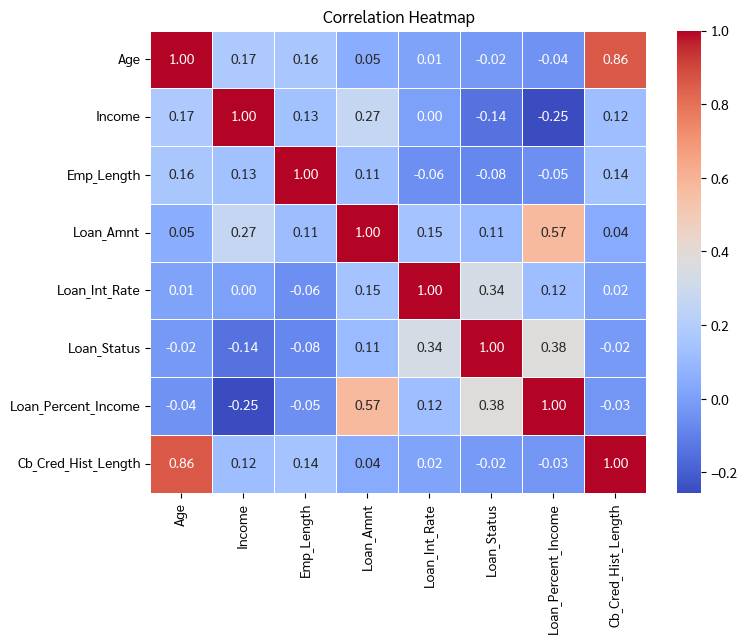

In [15]:
# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

## Variance Inflation Factor (VIF)

In [16]:
numeric_df = pd.DataFrame(df.select_dtypes(include=["number"]))
numeric_df

,Age,Income,Emp_Length,Loan_Amnt,Loan_Int_Rate,Loan_Status,Loan_Percent_Income,Cb_Cred_Hist_Length
0,22,59000,123,35000,16.02,1,0.59,3
1,21,9600,5,1000,11.14,0,0.10,2
2,25,9600,1,5500,12.87,1,0.57,3
3,23,65500,4,35000,15.23,1,0.53,2
4,24,54400,8,35000,14.27,1,0.55,4
...,...,...,...,...,...,...,...,...
32576,57,53000,1,5800,13.16,0,0.11,30
32577,54,120000,4,17625,7.49,0,0.15,19
32578,65,76000,3,35000,10.99,1,0.46,28
32579,56,150000,5,15000,11.48,0,0.10,26


In [17]:
# Add constant for intercept
X = add_constant(df.select_dtypes(include="number").dropna())

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28638 entries, 0 to 32580
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   const                28638 non-null  float64
 1   Age                  28638 non-null  int64  
 2   Income               28638 non-null  int64  
 3   Emp_Length           28638 non-null  Int64  
 4   Loan_Amnt            28638 non-null  int64  
 5   Loan_Int_Rate        28638 non-null  Float64
 6   Loan_Status          28638 non-null  int64  
 7   Loan_Percent_Income  28638 non-null  float64
 8   Cb_Cred_Hist_Length  28638 non-null  int64  
dtypes: Float64(1), Int64(1), float64(2), int64(5)
memory usage: 2.2 MB


In [19]:
# Convert all columns to standard float64 to ensure compatibility
X_numeric = X.astype(float)

# Calculating VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_numeric.values, i) 
                  for i in range(X_numeric.shape[1])]

print(vif_data)

               feature        VIF
0                const  56.985541
1                  Age   3.941476
2               Income   1.508461
3           Emp_Length   1.064903
4            Loan_Amnt   2.174360
5        Loan_Int_Rate   1.159783
6          Loan_Status   1.346153
7  Loan_Percent_Income   2.367170
8  Cb_Cred_Hist_Length   3.854312


### การแปลผลภาพรวม (Interpretation)

โดยทั่วไปเกณฑ์ตัดสินดังนี้:

VIF = 1: ไม่มีความสัมพันธ์กันเลย (ดีมาก)

VIF 1 - 5: มีความสัมพันธ์กันปานกลาง (ยอมรับได้ ไม่เป็นปัญหา)

VIF > 5 หรือ 10: มีความสัมพันธ์กันสูงมาก (อาจเป็นปัญหา) ตัวแปรเหล่านี้อาจซ้ำซ้อนกันเอง ทำให้โมเดลไม่เสถียร

**ชุดข้อมูล ไม่มีปัญหา Multicollinearity ที่รุนแรง**

### 🏆 ความสัมพันธ์เชิงบวกที่แข็งแกร่งที่สุด (Strongest Positive Correlation)
คู่ที่มีความสัมพันธ์กันชัดเจนที่สุดในตารางคือ: <br>

**Age ↔ Cb_Cred_Hist_Length ($r = 0.86$)**

มีความสัมพันธ์กันสูงมากในทิศทางเดียวกันการตีความ: ยิ่งผู้กู้มีอายุมาก ประวัติเครดิต (Credit History) ก็จะยิ่งยาวนานขึ้น ซึ่งเป็นเรื่องปกติทางธรรมชาติของการสะสมประวัติทางการเงิน

### ⚠️ ปัจจัยที่ส่งผลต่อความเสี่ยง (Loan Status Correlations)
หากพิจารณาตัวแปร Loan_Status (สมมติว่าค่าสูง = มีความเสี่ยง/ผิดนัดชำระ) พบความสัมพันธ์ที่น่าสนใจดังนี้: <br>

**Loan_Percent_Income ($r = 0.38$)**:

มีความสัมพันธ์เชิงบวกปานกลาง ยิ่งสัดส่วนหนี้ต่อรายได้สูง ความเสี่ยงที่จะเกิดหนี้เสียก็ยิ่งสูงขึ้น (เป็นปัจจัยที่ส่งผลกระทบมากที่สุดต่อ Status ในชุดข้อมูลนี้)

**Loan_Int_Rate ($r = 0.34$)**:

อัตราดอกเบี้ยแปรผันตามสถานะสินเชื่อ กลุ่มที่มีความเสี่ยงสูงมักต้องแบกรับดอกเบี้ยที่สูงกว่า หรือดอกเบี้ยที่สูงอาจเป็นตัวเร่งให้เกิดการผิดนัดชำระ

**Income ($r = -0.14$)**:

มีความสัมพันธ์เชิงลบเล็กน้อย หมายความว่าผู้ที่มีรายได้สูง มีแนวโน้มจะเป็นหนี้เสียน้อยกว่าผู้ที่มีรายได้ต่ำ แต่ความสัมพันธ์นี้ไม่แรงเท่ากับสัดส่วนหนี้ (Loan Percent Income)

### 💰 โครงสร้างหนี้และรายได้ (Loan & Income Structure)
ความสัมพันธ์ระหว่างยอดเงินกู้และรายได้ของผู้กู้:

**Loan_Amnt ↔ Loan_Percent_Income ($r = 0.57$)**

มีความสัมพันธ์ค่อนข้างสูง ยิ่งกู้ยอดเงินสูง สัดส่วนภาระหนี้ต่อรายได้ก็จะยิ่งสูงขึ้นตามไปด้วยอย่างชัดเจน

**Income ↔ Loan_Percent_Income ($r = -0.25$)**

มีความสัมพันธ์เชิงลบ (สีน้ำเงินเข้ม) แสดงว่าคนที่ รายได้สูง มักจะมีสัดส่วนยอดกู้ต่อรายได้ ต่ำ (ภาระหนี้เบากว่า) ในขณะที่คนรายได้น้อยมักกู้เกินตัวมากกว่า

### Weight of Evidence (WoE)

$$\text{WoE}_i = \ln \left( \frac{\% \text{ Non-default}_i}{\% \text{ Default}_i} \right)$$

In [20]:
df.columns

Index(['Age', 'Income', 'Home_Ownership', 'Emp_Length', 'Loan_Intent',
       'Loan_Grade', 'Loan_Amnt', 'Loan_Int_Rate', 'Loan_Status',
       'Loan_Percent_Income', 'Cb_Default_On_File', 'Cb_Cred_Hist_Length'],
      dtype='object')

In [21]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    # จัดกลุ่มข้อมูลตาม Feature และนับจำนวน Good (0) และ Bad (1)
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dff = pd.DataFrame(lst)
    dff['Dist_Good'] = dff['Good'] / dff['Good'].sum()
    dff['Dist_Bad'] = dff['Bad'] / dff['Bad'].sum()
    
    # คำนวณ WoE
    dff['WoE'] = np.log(dff['Dist_Good'] / dff['Dist_Bad'])
    dff.replace({'WoE': {np.inf: 0, -np.inf: 0}}, inplace=True)
    
    # คำนวณ IV
    dff['IV'] = (dff['Dist_Good'] - dff['Dist_Bad']) * dff['WoE']
    iv = dff['IV'].sum()
    
    return dff, iv

In [22]:
def plot_woe(woe_df, feature_name):
    plt.figure(figsize=(10, 6))
    
    # พลอตกราฟเส้นเพื่อดูแนวโน้ม (Trend)
    sns.pointplot(x='Value', y='WoE', data=woe_df, color='#1f77b4')
    
    # ตกแต่งกราฟ
    plt.title(f'Weight of Evidence (WoE) for {feature_name}', fontsize=14)
    plt.axhline(y=0, color='red', linestyle='--', alpha=0.5) # เส้นแบ่งความเสี่ยงปกติ
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.ylabel('WoE Value')
    plt.xlabel(f'Bins of {feature_name}')
    
    plt.tight_layout()
    plt.show()

In [23]:
def calculate_ks(woe_df):
    # ตรวจสอบให้แน่ใจว่าเรียงลำดับตามความเสี่ยงแล้ว
    df_ks = woe_df.sort_values(by='WoE').reset_index(drop=True)
    
    # คำนวณ % สะสม
    df_ks['Cumulative_Good'] = df_ks['Dist_Good'].cumsum()
    df_ks['Cumulative_Bad'] = df_ks['Dist_Bad'].cumsum()
    
    # คำนวณส่วนต่าง
    df_ks['KS_Diff'] = np.abs(df_ks['Cumulative_Good'] - df_ks['Cumulative_Bad'])
    
    ks_value = df_ks['KS_Diff'].max()
    return ks_value, df_ks

### Automated Binning (ใช้สถิติ)

In [24]:
# แบ่งรายได้ (Income) เป็น 5 กลุ่ม กลุ่มละเท่าๆ กัน (Quantile-based)
df['income_bin'] = pd.qcut(df['Income'], q=5, precision=0)

In [25]:
# แบ่ง Loan_Int_Rate เป็น 5 กลุ่ม กลุ่มละเท่าๆ กัน (Quantile-based)
df['Loan_Int_Rate_bin'] = pd.qcut(df['Loan_Int_Rate'], q=5, precision=0)

In [26]:
# ตัวอย่างการแบ่งช่วงอายุ (Age) ตามเกณฑ์ที่กำหนดเอง
bins = [0, 25, 35, 45, 60, 100]
labels = ['<25', '25-35', '35-45', '45-60', '>60']

df['age_bin'] = pd.cut(df['Age'], bins=bins, labels=labels)

### Calculate WOE 

#### ตัวแปร 'person_home_ownership'

Information Value: 0.37699817947172454
      Value    All   Good   Bad  Dist_Good  Dist_Bad       WoE        IV
0      RENT  16446  11254  5192   0.441801  0.730445 -0.502794  0.145128
1       OWN   2584   2391   193   0.093864  0.027153  1.240379  0.082748
2  MORTGAGE  13444  11754  1690   0.461430  0.237760  0.663067  0.148308
3     OTHER    107     74    33   0.002905  0.004643 -0.468841  0.000815


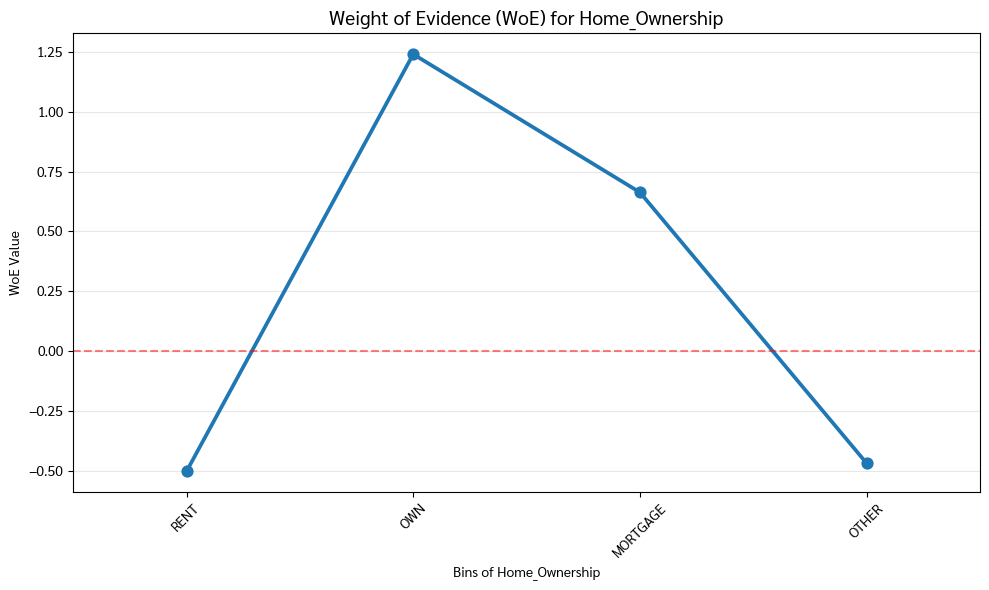

In [27]:
# 'person_home_ownership'
woe_df, iv_value = calculate_woe_iv(df, 'Home_Ownership', 'Loan_Status')
print(f"Information Value: {iv_value}")
print(woe_df)

plot_woe(woe_df, 'Home_Ownership')

In [28]:
ks_score, ks_table = calculate_ks(woe_df)
print(f"KS Statistic: {ks_score:.4f}")

KS Statistic: 0.2904


#### ตัวแปร 'income_bin'

Information Value: 0.4617250888756999
                  Value   All  Good   Bad  Dist_Good  Dist_Bad       WoE  \
0    (49000.0, 63000.0]  6397  5233  1164   0.205433  0.163759  0.226724   
1     (3999.0, 35000.0]  6630  3762  2868   0.147686  0.403489 -1.005062   
2    (63000.0, 86000.0]  6515  5567   948   0.218545  0.133371  0.493859   
3  (86000.0, 6000000.0]  6493  5900   593   0.231618  0.083427  1.021115   
4    (35000.0, 49000.0]  6546  5011  1535   0.196718  0.215954 -0.093293   

         IV  
0  0.009449  
1  0.257098  
2  0.042064  
3  0.151320  
4  0.001795  


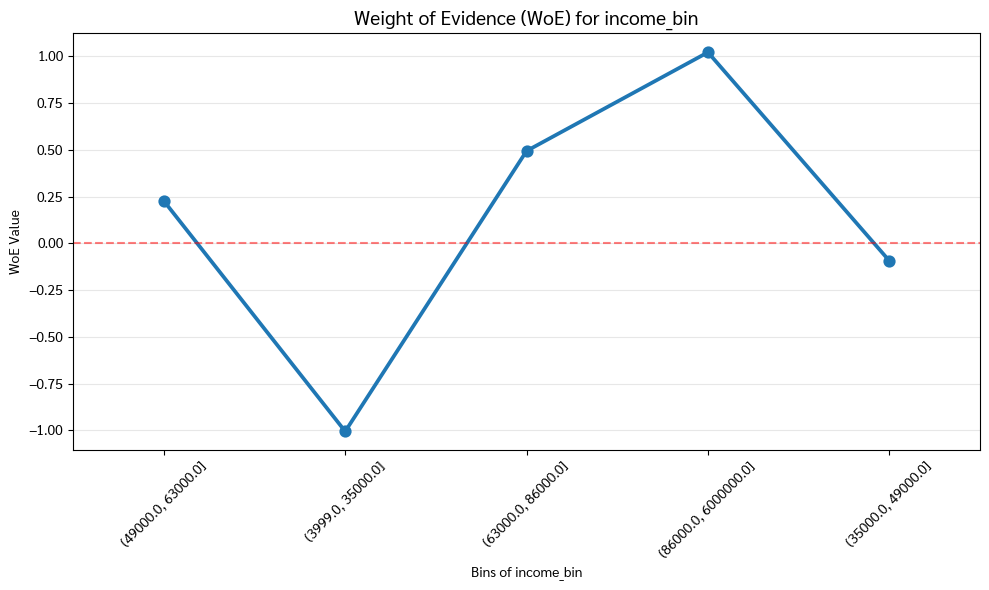

In [29]:
# 'income_bin'
woe_df, iv_value = calculate_woe_iv(df, 'income_bin', 'Loan_Status')
print(f"Information Value: {iv_value}")
print(woe_df)

plot_woe(woe_df, 'income_bin')

In [30]:
ks_score, ks_table = calculate_ks(woe_df)
print(f"KS Statistic: {ks_score:.4f}")

KS Statistic: 0.2750


#### ตัวแปร 'Loan_Int_Rate'

Information Value: 0.6818803744076279
          Value   All  Good   Bad  Dist_Good  Dist_Bad       WoE        IV
0  (14.0, 23.0]  5868  2898  2970   0.125995  0.459468 -1.293830  0.431458
1  (10.0, 12.0]  5779  4821   958   0.209600  0.148205  0.346600  0.021279
2  (12.0, 14.0]  5814  4613  1201   0.200556  0.185798  0.076434  0.001128
3    (4.0, 8.0]  6016  5490   526   0.238685  0.081374  1.076093  0.169282
4   (8.0, 10.0]  5988  5179   809   0.225164  0.125155  0.587279  0.058733


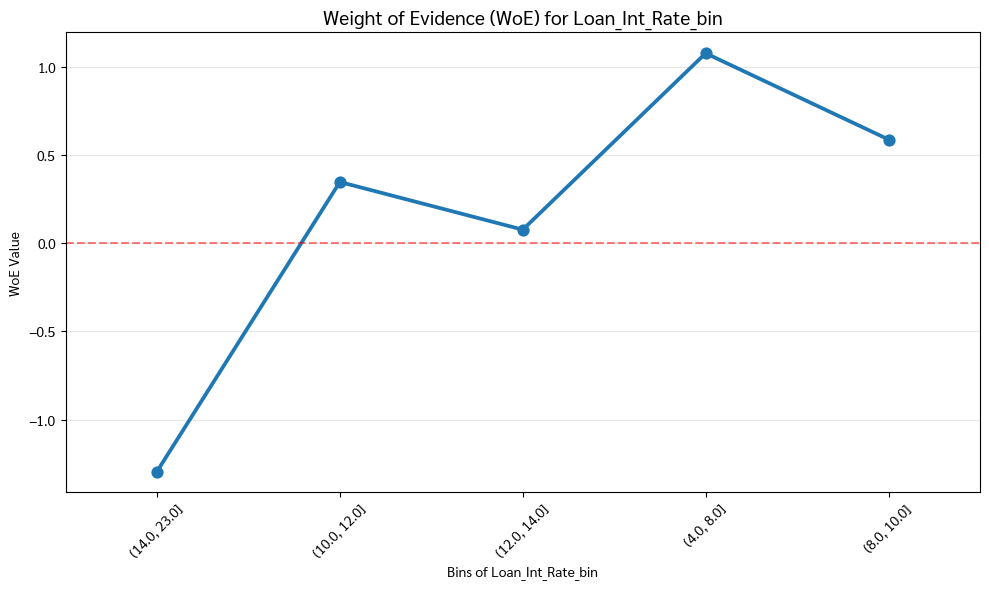

In [31]:
woe_df, iv_value = calculate_woe_iv(df, 'Loan_Int_Rate_bin', 'Loan_Status')
print(f"Information Value: {iv_value}")
print(woe_df)

plot_woe(woe_df, 'Loan_Int_Rate_bin')

In [32]:
ks_score, ks_table = calculate_ks(woe_df)
print(f"KS Statistic: {ks_score:.4f}")

KS Statistic: 0.3335


#### ตัวแปร 'Age'

Information Value: 0.004616946069285549
   Value    All   Good   Bad  Dist_Good  Dist_Bad       WoE            IV
0    <25  15352  11817  3535   0.464870  0.498519 -0.069884  2.351532e-03
1  25-35  13763  10917  2846   0.429465  0.401354  0.067697  1.903036e-03
2    NaN      0      0     0   0.000000  0.000000       NaN           NaN
3  35-45   2814   2231   583   0.087766  0.082217  0.065308  3.623715e-04
4  45-60    582    455   127   0.017899  0.017910 -0.000600  6.436204e-09


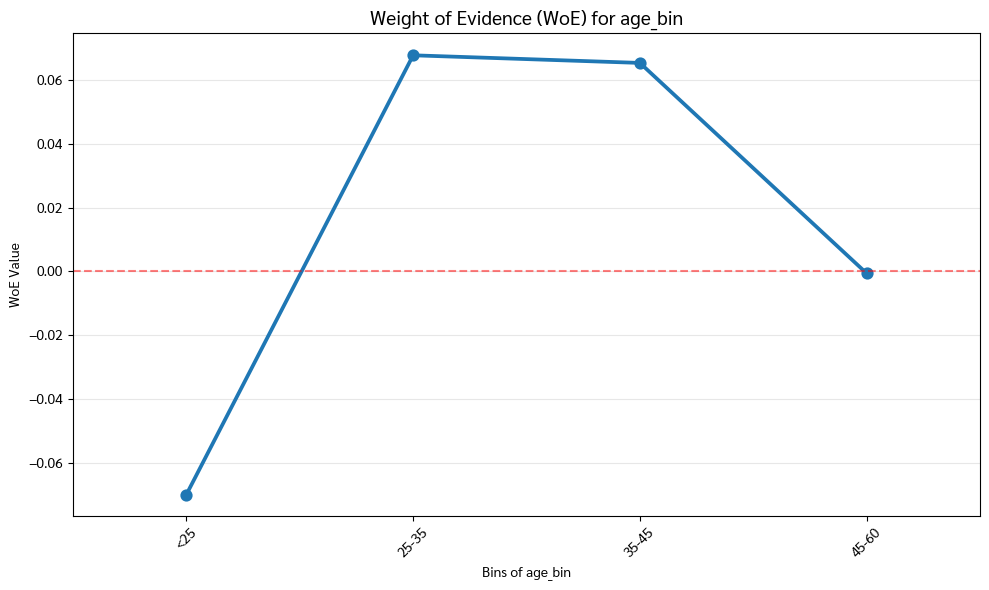

In [33]:
woe_df, iv_value = calculate_woe_iv(df, 'age_bin', 'Loan_Status')
print(f"Information Value: {iv_value}")
print(woe_df)

plot_woe(woe_df, 'age_bin')

In [34]:
ks_score, ks_table = calculate_ks(woe_df)
print(f"KS Statistic: {ks_score:.4f}")

KS Statistic: 0.0337


#### ตัวแปร 'Emp_Length'

<Axes: >

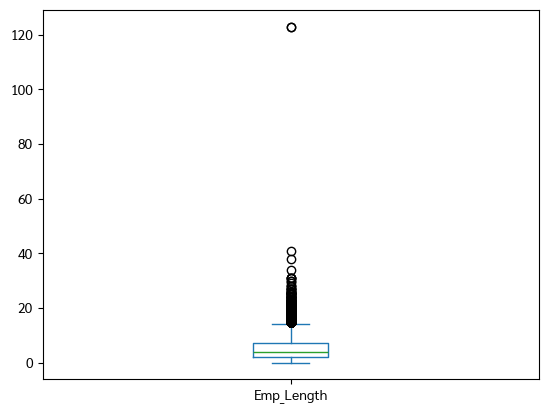

In [35]:
df['Emp_Length'].dropna().plot.box()

In [36]:
df['Emp_Length'].max()

123

In [37]:
# ตัวอย่างการแบ่งช่วงอายุ (Age) ตามเกณฑ์ที่กำหนดเอง
bins = [0, 2, 4, 6, 8, 10, 40, float('inf')]
labels = ['<2', '2-4', '4-6', '6-8', '8-10', '10-40', '>40']

df['Emp_Length_bin'] = pd.cut(df['Emp_Length'], bins=bins, labels=labels, right=False)

In [38]:
df['Emp_Length_bin'].value_counts()

Emp_Length_bin
2-4      7305
<2       7020
4-6      5820
6-8      4862
10-40    3622
8-10     3054
>40         3
Name: count, dtype: int64

Information Value: 0.054521808854915574
   Value   All  Good   Bad  Dist_Good  Dist_Bad       WoE        IV
6  10-40  3622  3028   594   0.121802  0.087020  0.336257  0.011696
4    2-4  7305  5622  1683   0.226146  0.246557 -0.086412  0.001764
1    4-6  5820  4662  1158   0.187530  0.169645  0.100229  0.001793
5    6-8  4862  3950   912   0.158890  0.133607  0.173310  0.004382
3   8-10  3054  2529   525   0.101730  0.076912  0.279660  0.006941
2     <2  7020  5067  1953   0.203821  0.286112 -0.339139  0.027908
0    >40     3     2     1   0.000080  0.000146 -0.599374  0.000040


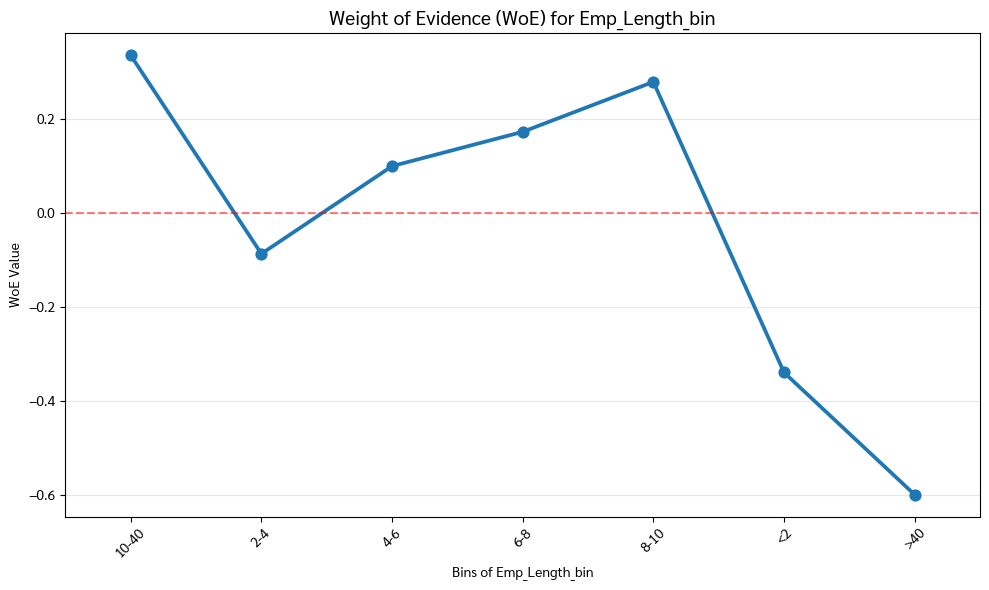

In [47]:
woe_df, iv_value = calculate_woe_iv(df, 'Emp_Length_bin', 'Loan_Status')
woe_df = woe_df.sort_values('Value')
print(f"Information Value: {iv_value}")
print(woe_df)

plot_woe(woe_df, 'Emp_Length_bin')

In [41]:
ks_score, ks_table = calculate_ks(woe_df)
print(f"KS Statistic: {ks_score:.4f}")

KS Statistic: 0.1028


### การแปลความหมายค่า KS
ค่า KS จะมีค่าอยู่ระหว่าง 0 ถึง 1 (หรือ 0% ถึง 100%):

> < 20%: ความสามารถในการแยกแยะต่ำมาก (โมเดลใช้ไม่ได้)

> 20% - 40%: ความสามารถในการแยกแยะปานกลาง (ยอมรับได้สำหรับงานทั่วไป)

> 40% - 50%: ดีมาก (Good) เป็นช่วงที่เหมาะสมสำหรับ Credit Scoring

> 50% - 70%: ยอดเยี่ยม (Excellent)

> 70%>: สูงผิดปกติ (อาจเกิด Overfitting หรือตัวแปรนั้นมีเฉลยอยู่ในตัวแล้ว เช่น เอาคอลัมน์ "ยอดค้างชำระปัจจุบัน" ไปทำนาย "การเบี้ยวหนี้")

### เกณฑ์การแปลความหมาย IV:

> <0.02: ไม่มีอำนาจในการพยากรณ์

>0.02 - 0.1: อำนาจการพยากรณ์ต่ำ

>0.1 - 0.3: อำนาจการพยากรณ์ปานกลาง

>0.3 - 0.5: อำนาจการพยากรณ์สูง

> 0.5>: สูงผิดปกติ (อาจเกิด Overfitting หรือ Data Leakage)